In [1]:
from scipy.fft import fft, fftfreq, fftshift
# import scipy
import matplotlib.pyplot as plt
import numpy as np
# import math
# from numpy import array, ceil, complex, exp, pi, zeros
# from numpy.random import rand, randint, randn
# from numpy.fft import irfft
# from scipy.signal import firwin, lfilter
# __pinv_rcond__ = 1e-8

In [2]:
import helpers
import plots
import asdm

In [3]:
dur = 0.1
dt = 1e-4
f = 256
bw = 2*np.pi*f
t = np.arange(0, dur, dt)

u = helpers.gen_band_limited(dur, dt, f)

b = 7  # bias
d = 0.2  # threshold
k = 0.01 # scaling factor

dte = 0

z, ys, zs = asdm.asdm_encode(u, dt, b, d, k, dte)

u_rec = asdm.asdm_decode(z, dur, dt, bw, b, d, k)

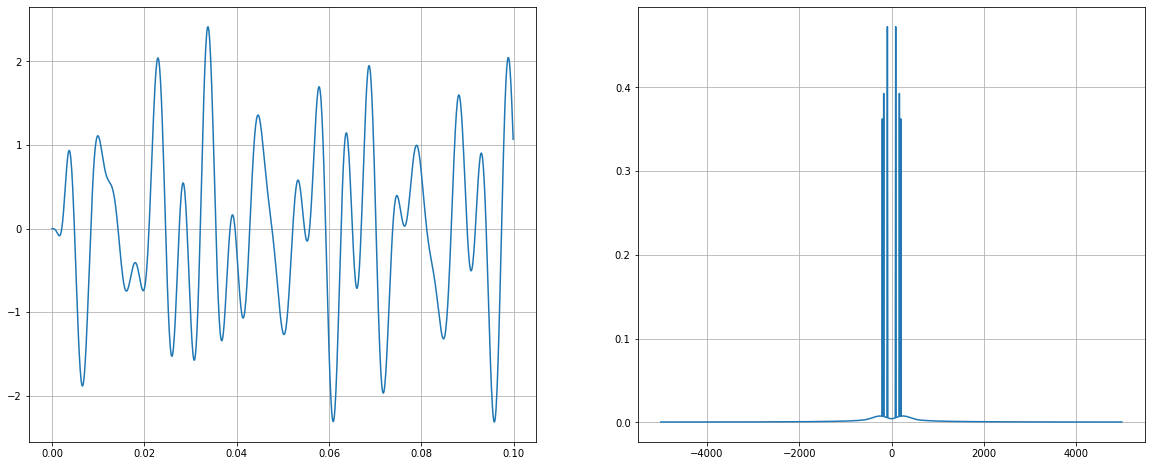

In [4]:
y = u

yf = fft(y)
xf = fftfreq(len(t), dt)
xf = fftshift(xf)

yplot = fftshift(yf)

plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(t, y)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(xf, 1.0/len(t) * np.abs(yplot))
plt.grid()

plt.show()

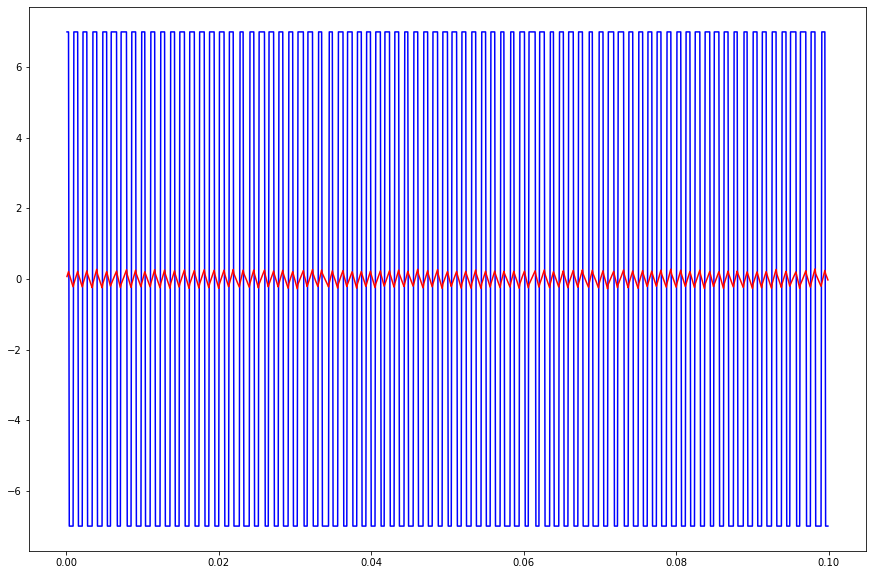

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(t[1:], zs, 'b')
plt.plot(t[1:], ys, 'r')

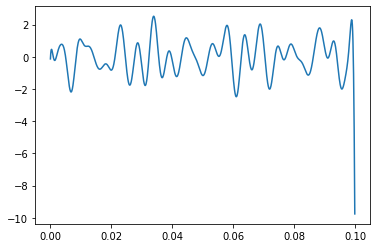

In [6]:
plt.plot(t, u_rec)

Signal Encoded Using ASDM Encoder


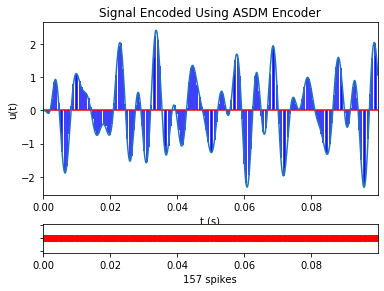

In [7]:
# output_count += 1
fig_title = 'Signal Encoded Using ASDM Encoder'
print (fig_title)
# s, ys, zs = helpers.func_timer(asdm.asdm_encode)(u, dt, b, d, k)
plots.plot_encoded(t, u, z, fig_title)

Signal Decoded Using ASDM Decoder


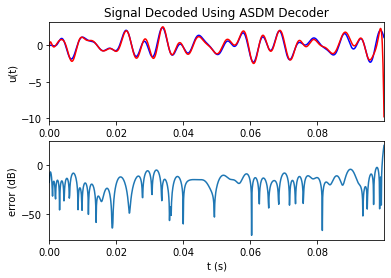

In [8]:
# output_count += 1
fig_title = 'Signal Decoded Using ASDM Decoder'
print (fig_title)
# u_rec = helpers.func_timer(asdm.asdm_decode)(s, dur, dt, bw, b, d, k)
plots.plot_compare(t, u, u_rec, fig_title)

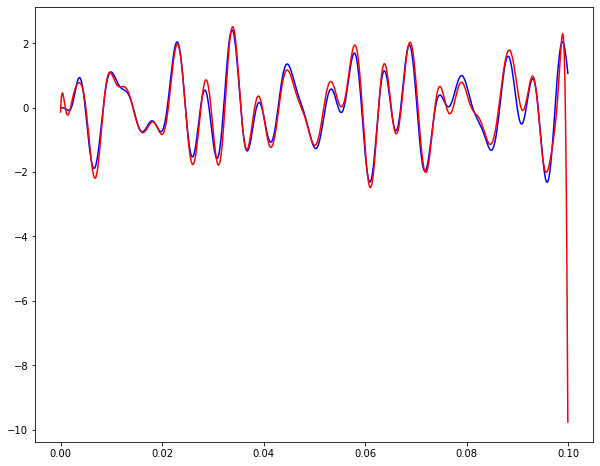

In [9]:
plt.figure(figsize=(10,8))
plt.plot(t, u, 'b')
plt.plot(t, u_rec, 'r')
plt.show()